In [1]:
import sys
!{sys.executable} -m pip install pandas numpy seaborn matplotlib plotly sklearn

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn import random_projection


sns.set(rc={'figure.figsize':(8,8)})


In [45]:
all_stats = pd.read_csv("lebron-james-cavs-data.csv")
player_stats = all_stats[['PTS', 'BLK', 'STL', 'AST','TRB']]


In [46]:
#Without feature scaling, e.g. a difference of 1 point scored is weighted the same as a difference in 1 rebound
kmeans = KMeans(n_clusters=5).fit(player_stats)
print(kmeans.cluster_centers_)

[[24.3625      0.675       1.3625      6.1125      7.1       ]
 [39.32        1.04        1.6         8.08        9.32      ]
 [16.8852459   0.49180328  1.19672131  7.73770492  6.55737705]
 [25.21818182  1.03636364  1.43636364 12.25454545  9.54545455]
 [31.4875      0.575       1.5         7.2625      7.5375    ]]


In [47]:
scaled_player_stats = preprocessing.scale(player_stats)

embedded = TSNE(n_components=2).fit_transform(scaled_player_stats)

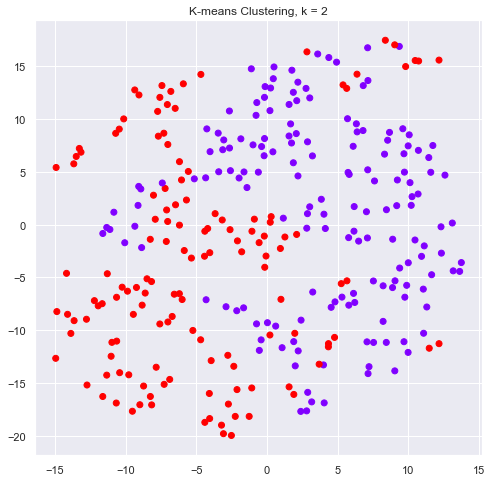

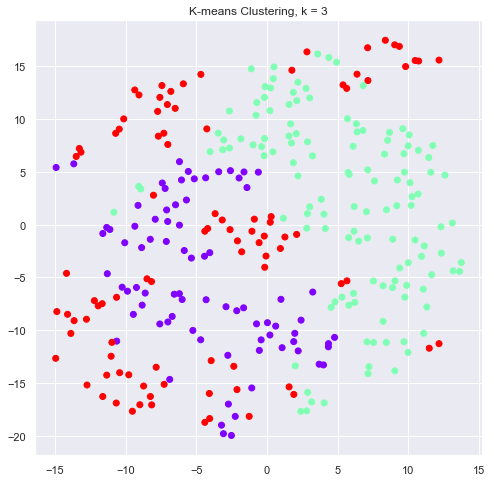

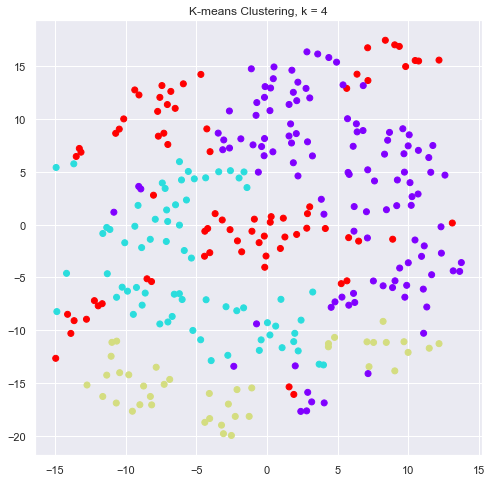

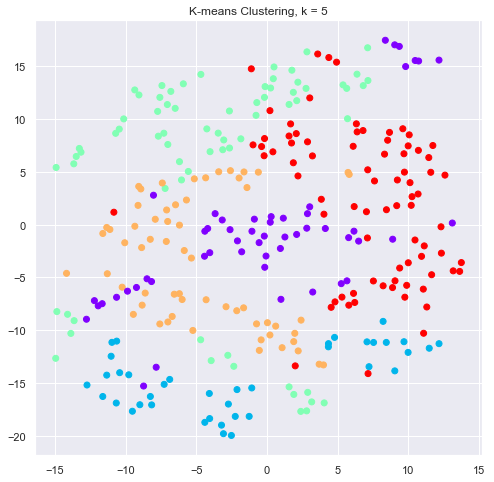

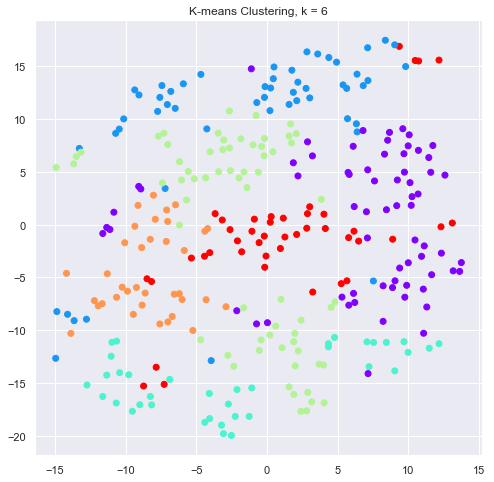

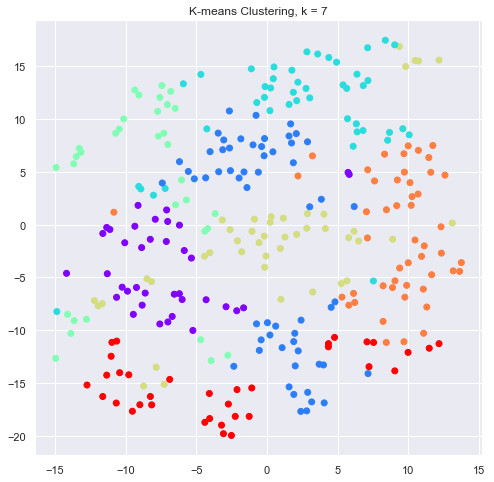

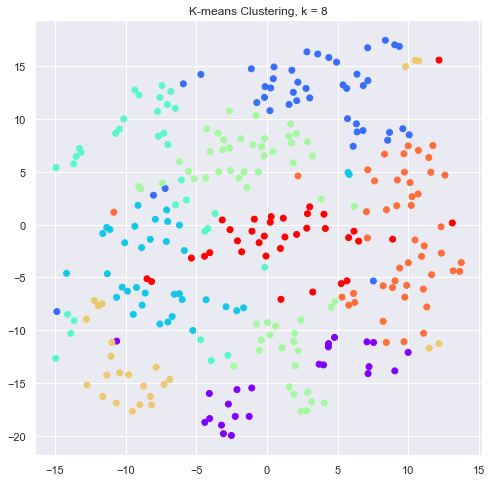

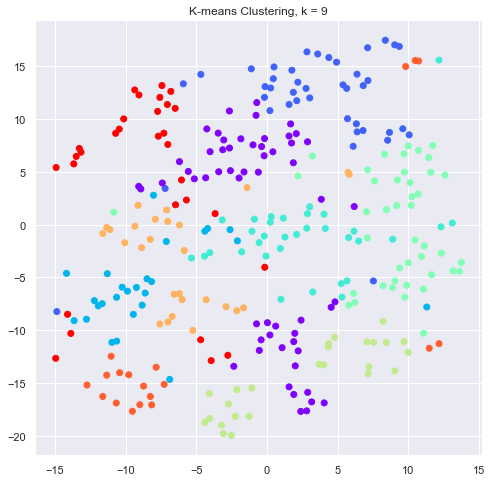

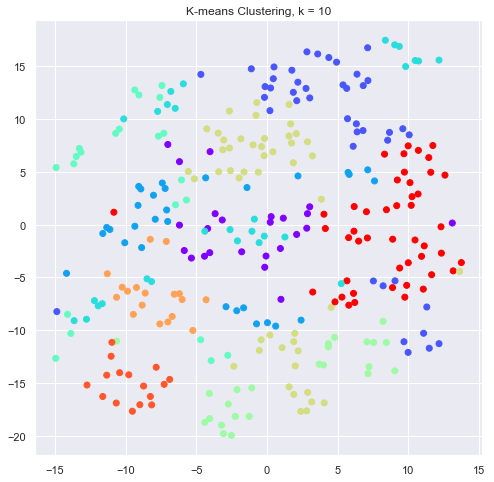

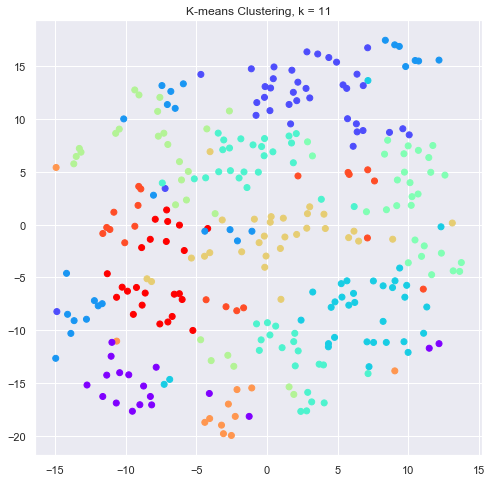

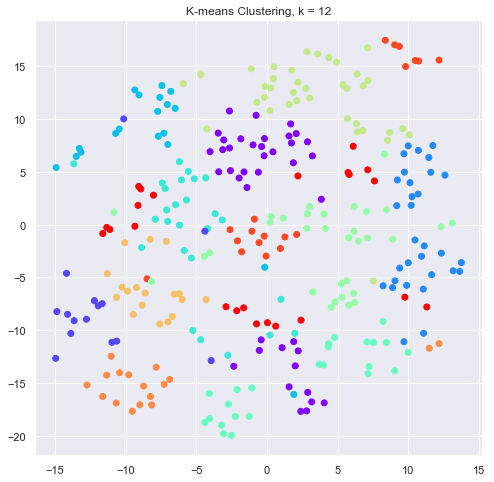

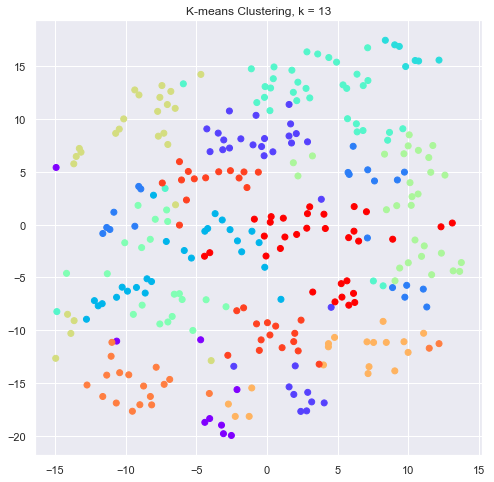

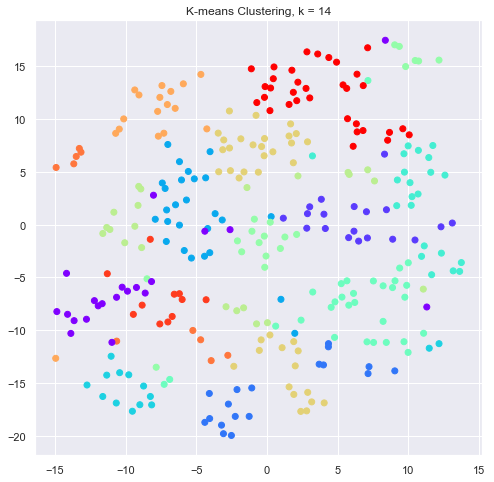

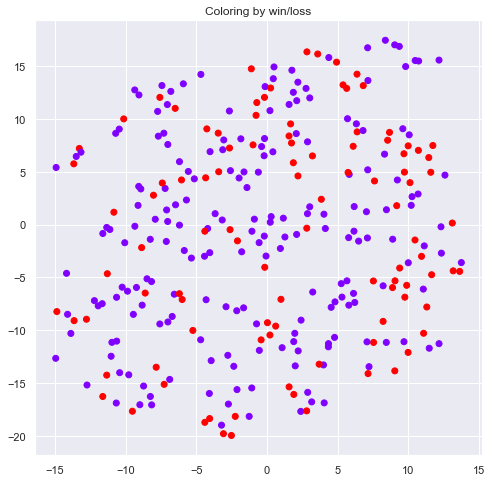

In [48]:
for k in range(2, 15):
    scaled_kmeans = KMeans(n_clusters=k).fit(scaled_player_stats)

    plt.scatter(embedded[:,0], embedded[:,1], c=scaled_kmeans.labels_, cmap='rainbow')
    plt.title("K-means Clustering, k = " + str(k))
    plt.show()

label_map = {}
position_coloring = []
next_value = 0


position_coloring = []
for winlosescore in all_stats['+/-'].tolist():
    if winlosescore > 0:
        position_coloring.append(0)
    else:
        position_coloring.append(1)

plt.scatter(embedded[:,0], embedded[:,1], c=position_coloring, cmap='rainbow')
plt.title("Coloring by win/loss")
plt.show()



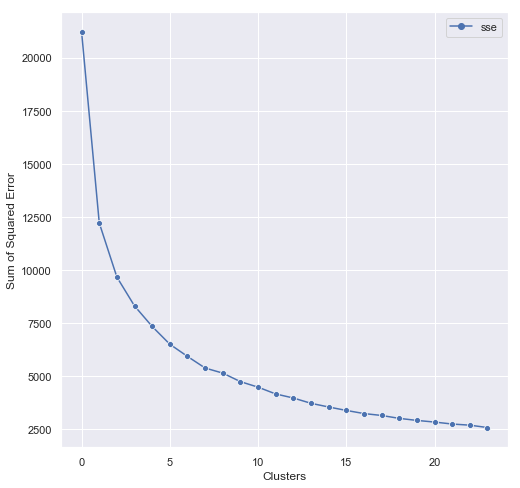

In [52]:
#different values of k
sse = []
for k in range(1,25):
    kmeans = KMeans(n_clusters=k).fit(player_stats[stat_categories])
#     embedded = TSNE(n_components=2).fit_transform(scaled_player_stats)
    sse.append(kmeans.inertia_)
    
sse_df = pd.DataFrame({'sse':sse})

sns.lineplot(data=sse_df, markers=True)
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

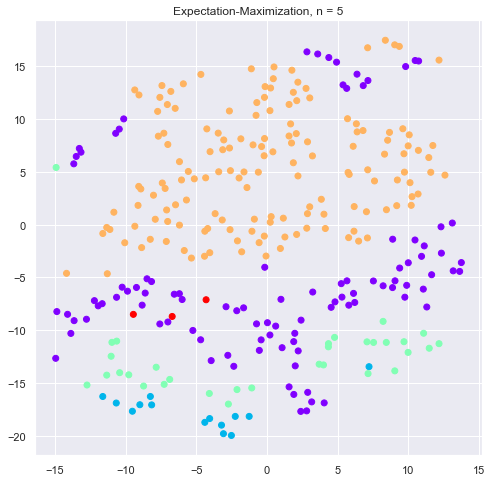

In [53]:
gmm = GaussianMixture(n_components=5).fit(player_stats[stat_categories])
labels = gmm.predict(player_stats[stat_categories])

plt.scatter(embedded[:,0], embedded[:,1], c=labels, cmap='rainbow')
plt.title('Expectation-Maximization, n = ' + str(5))
plt.show()

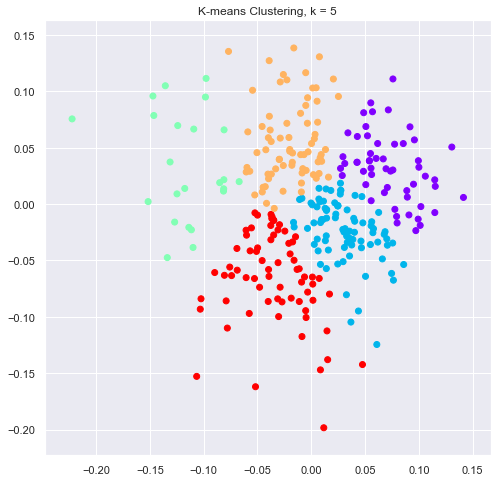

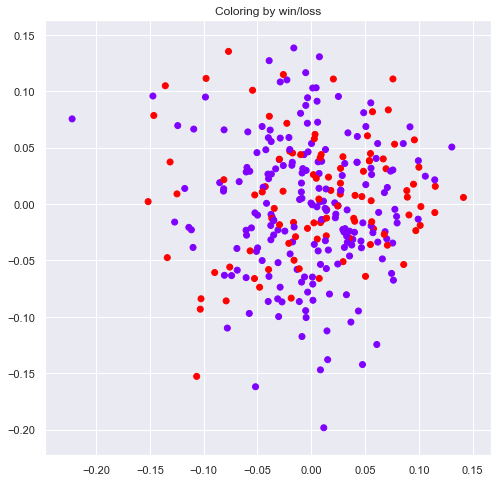

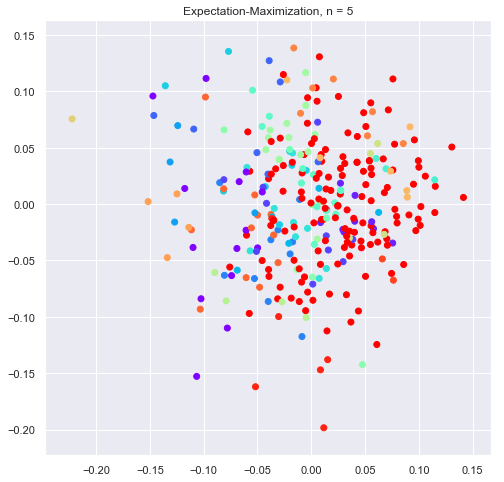

In [56]:
ica = FastICA(n_components=2, random_state=0)
ica.fit(scaled_player_stats)
icaed = ica.transform(scaled_player_stats)
scaled_kmeans = KMeans(n_clusters=5).fit(icaed)

plt.scatter(icaed[:,0], icaed[:,1], c=scaled_kmeans.labels_, cmap='rainbow')
plt.title("K-means Clustering, k = " + str(5))
plt.show()


label_map = {}
position_coloring = []
next_value = 0


position_coloring = []
for winlosescore in all_stats['+/-'].tolist():
    if winlosescore > 0:
        position_coloring.append(0)
    else:
        position_coloring.append(1)

plt.scatter(icaed[:,0], icaed[:,1], c=position_coloring, cmap='rainbow')
plt.title("Coloring by win/loss")
plt.show()


gmm = GaussianMixture(n_components=k).fit(player_stats[stat_categories])

labels = gmm.predict(player_stats[stat_categories])

plt.scatter(icaed[:,0], icaed[:,1], c=labels, cmap='rainbow')
plt.title('Expectation-Maximization, n = ' + str(5))
plt.show()

[1.34290355 1.07297868]


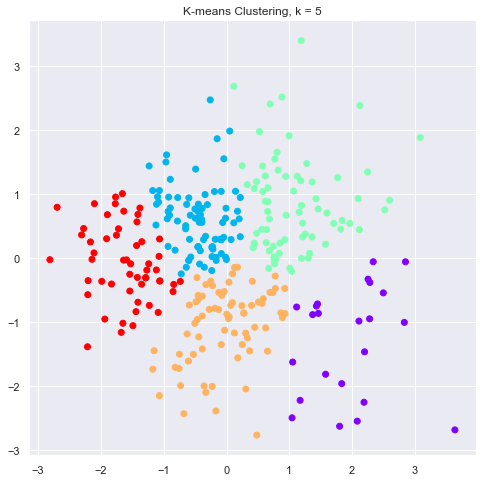

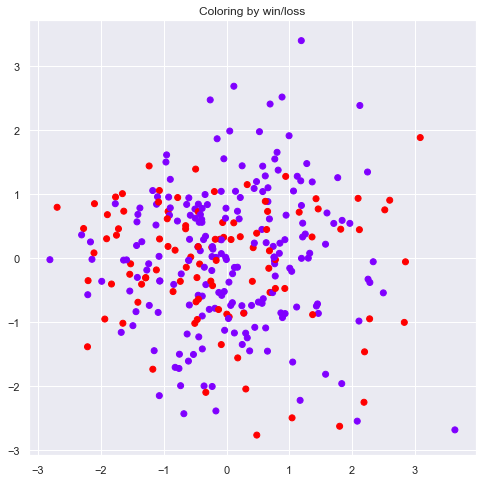

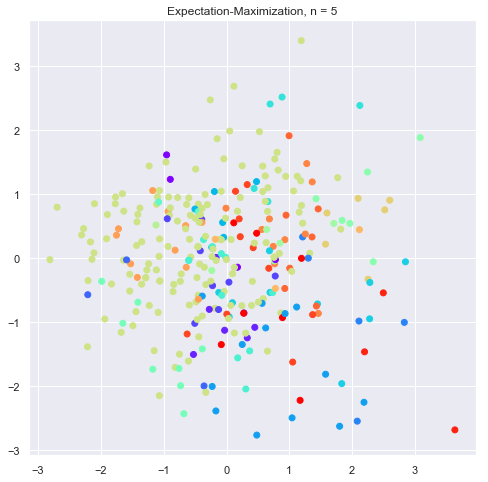

In [57]:

pca = PCA(n_components=2)
pca.fit(scaled_player_stats)
pcaed = pca.transform(scaled_player_stats)
scaled_kmeans = KMeans(n_clusters=5).fit(pcaed)
print(pca.explained_variance_)

plt.scatter(pcaed[:,0], pcaed[:,1], c=scaled_kmeans.labels_, cmap='rainbow')
plt.title("K-means Clustering, k = " + str(5))
plt.show()



position_coloring = []
for winlosescore in all_stats['+/-'].tolist():
    if winlosescore > 0:
        position_coloring.append(0)
    else:
        position_coloring.append(1)

plt.scatter(pcaed[:,0], pcaed[:,1], c=position_coloring, cmap='rainbow')
plt.title("Coloring by win/loss")
plt.show()



gmm = GaussianMixture(n_components=k).fit(player_stats[stat_categories])

labels = gmm.predict(player_stats[stat_categories])

plt.scatter(pcaed[:,0], pcaed[:,1], c=labels, cmap='rainbow')
plt.title('Expectation-Maximization, n = ' + str(5))
plt.show()

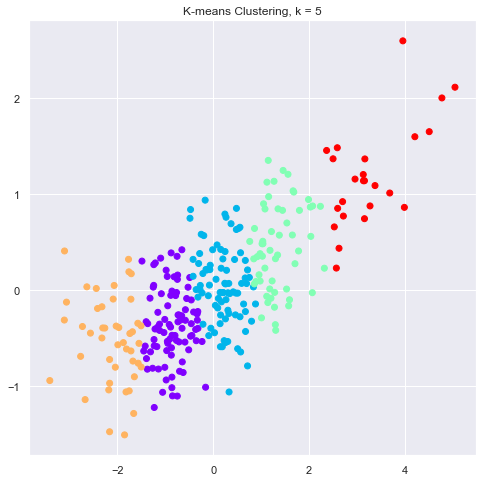

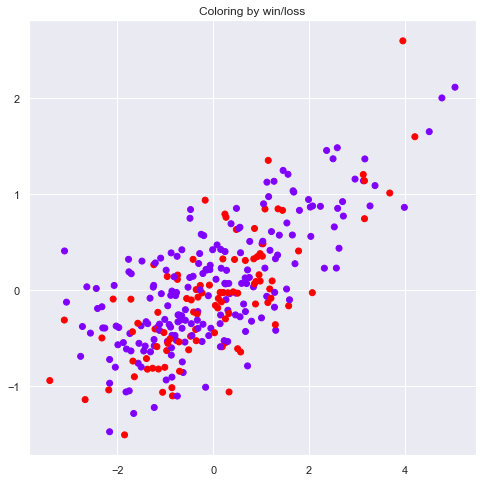

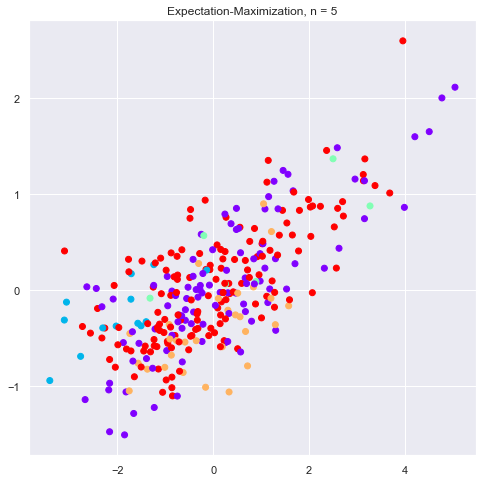

In [58]:
for k in range(5, 6):
    transformer = random_projection.GaussianRandomProjection(n_components=2)
    random_projectioned = transformer.fit_transform(scaled_player_stats)

    scaled_kmeans = KMeans(n_clusters=k).fit(random_projectioned)

    plt.scatter(random_projectioned[:,0], random_projectioned[:,1], c=scaled_kmeans.labels_, cmap='rainbow')
    plt.title("K-means Clustering, k = " + str(k))
    plt.show()

    position_coloring = []
    for winlosescore in all_stats['+/-'].tolist():
        if winlosescore > 0:
            position_coloring.append(0)
        else:
            position_coloring.append(1)

    plt.scatter(random_projectioned[:,0], random_projectioned[:,1], c=position_coloring, cmap='rainbow')
    plt.title("Coloring by win/loss")
    plt.show()

    gmm = GaussianMixture(n_components=k).fit(player_stats[stat_categories])
    
    labels = gmm.predict(player_stats[stat_categories])

    plt.scatter(random_projectioned[:,0], random_projectioned[:,1], c=labels, cmap='rainbow')
    plt.title('Expectation-Maximization, n = ' + str(5))
    plt.show()